# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [3]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [4]:
# your code here

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

print("Shape of Training Set = {}".format(x_train.shape))
print("Shape of Training Labels = {}".format(y_train.shape))

print("Shape of Test Set = {}".format(x_test.shape))
print("Shape of Test Labels = {}".format(y_test.shape))

print("Min of x_train = {}".format(x_train.min()))
print("Max of x_train = {}".format(x_train.max()))

print("Min of x_test = {}".format(x_test.min()))
print("Min of x_test = {}".format(x_test.max()))

print("Training Labels = {}\nLabel Counts = {}".format(np.unique(y_train, return_counts=True)[0], 
                                                  np.unique(y_train, return_counts=True)[1]))

Shape of Training Set = (60000, 28, 28)
Shape of Training Labels = (60000,)
Shape of Test Set = (10000, 28, 28)
Shape of Test Labels = (10000,)
Min of x_train = 0.0
Max of x_train = 1.0
Min of x_test = 0.0
Min of x_test = 1.0
Training Labels = [0 1 2 3 4 5 6 7 8 9]
Label Counts = [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


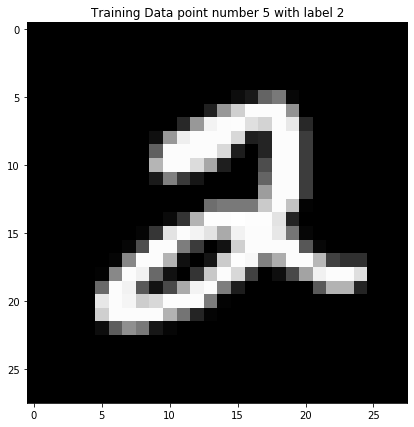

In [7]:
# your code here

plt.figure(figsize=(7,7))
plt.imshow(x_train[5,:,:], cmap='gray')
plt.title("Training Data point number {} with label {}".format(5, y_train[5]))
plt.show()

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [12]:
# your code here

pca = PCA(n_components=2)
pca_latent_train = pca.fit_transform(x_train.reshape(x_train.shape[0], -1))
pca_latent_test = pca.transform(x_test.reshape(x_test.shape[0], -1))

print("Shape of pca_latent_train = {}".format(pca_latent_train.shape))
print("Shape of pca_latent_test = {}".format(pca_latent_test.shape))

Shape of pca_latent_train = (60000, 2)
Shape of pca_latent_test = (10000, 2)


**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


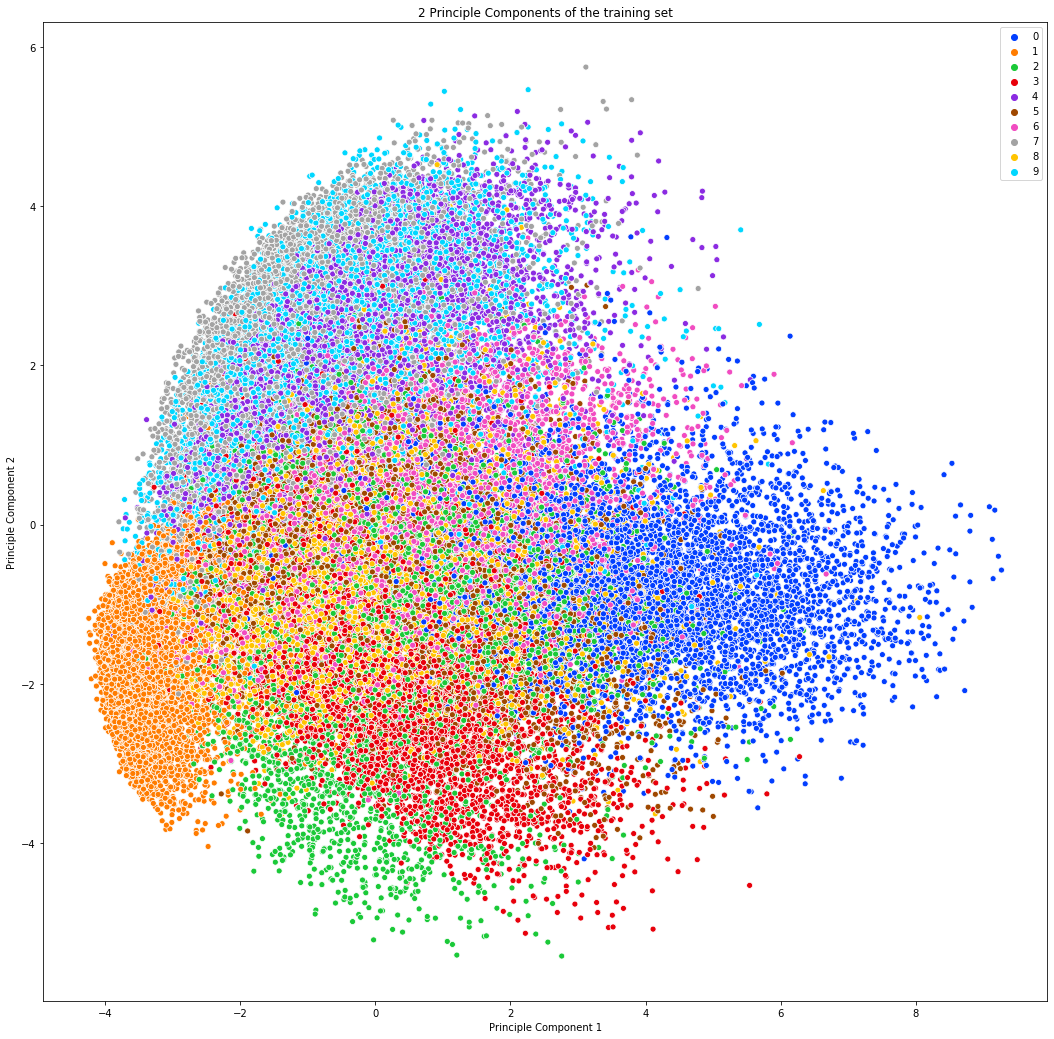

In [15]:
# your code here

import seaborn as sns

fig = plt.figure(figsize=(18, 18))
sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
plt.title('2 Principle Components of the training set')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


In [88]:
# your code here
tf.keras.backend.clear_session()

input_dim = x_train.shape[1:]
encoding_dim = 2  

linear_encoder = Sequential(name='Linear_Encoder')
linear_encoder.add(Input(shape=(input_dim)))
linear_encoder.add(Flatten())
linear_encoder.add(Dense(encoding_dim, use_bias=False, activation='linear'))
print(linear_encoder.summary())

linear_decoder = Sequential(name='Linear_Decoder')
linear_decoder.add(Input(shape=(encoding_dim,)))
linear_decoder.add(Dense(input_dim[0]*input_dim[1], use_bias=False, activation='linear'))
linear_decoder.add(Reshape(target_shape=input_dim))
print(linear_decoder.summary())

#create autoencoder model which has input as input_features and outputs decoded
#lae = Model(inputs=linear_encoder, outputs=linear_decoder)
lae = Sequential()
lae.add(Input(shape=(input_dim)))
lae.add(linear_encoder)
lae.add(linear_decoder)
print(lae.summary())

Model: "Linear_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
None
Model: "Linear_Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               1568      
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequen

In [89]:
opt = tf.keras.optimizers.Adam(lr = 0.0001)
# opt = tf.keras.optimizers.SGD(lr = 0.001)
lae.compile(optimizer=opt, loss='mse')

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [90]:
# your code here

history_lae =lae.fit(x_train, x_train,
                          epochs=10,
                          batch_size=16,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0670 - val_loss: 0.0599
Epoch 2/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0583 - val_loss: 0.0578
Epoch 3/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0579 - val_loss: 0.0577
Epoch 4/10
60000/60000 [==============================] - 8s 142us/sample - loss: 0.0578 - val_loss: 0.0577
Epoch 5/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0578 - val_loss: 0.0578
Epoch 6/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0578 - val_loss: 0.0578
Epoch 7/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0578 - val_loss: 0.0578
Epoch 8/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0578 - val_loss: 0.0577
Epoch 9/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0

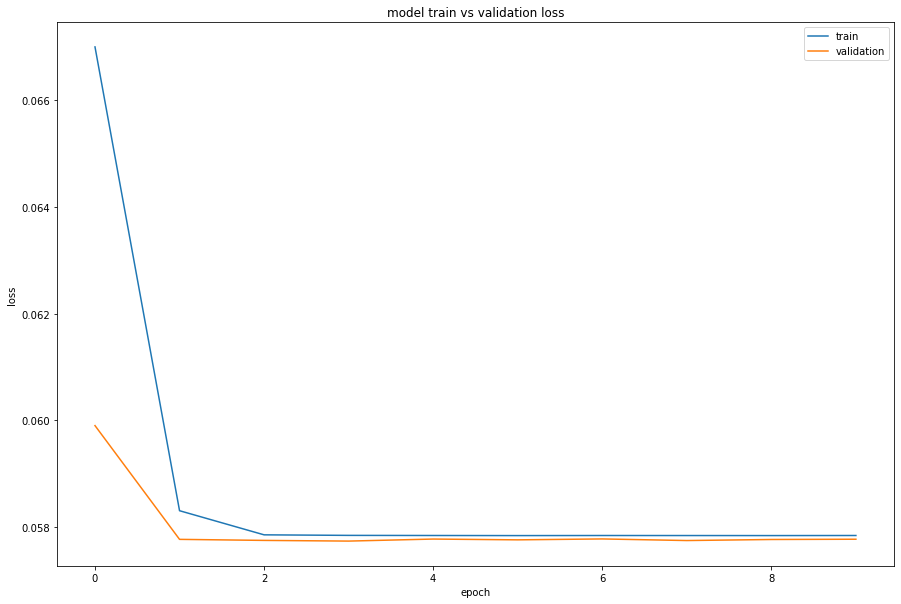

In [91]:
# your code here

plt.figure(figsize=(15, 10))
plt.plot(history_lae.history['loss'])
plt.plot(history_lae.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


In [35]:
# your code here

lae_latent_train = linear_encoder.predict(x_train)
lae_latent_train.shape

(60000, 2)

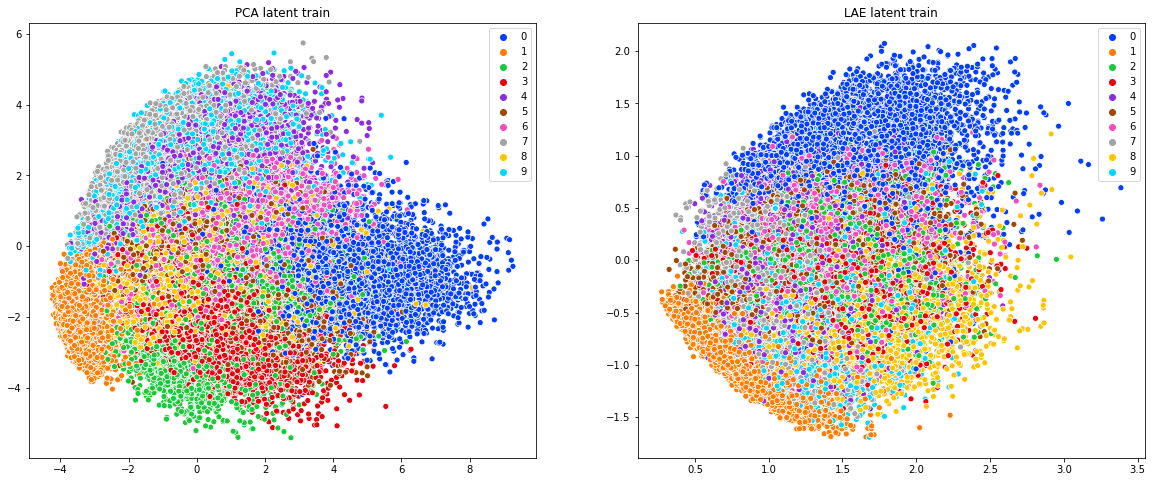

In [92]:
# your code here

fig = plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
plt.title('PCA latent train')

plt.subplot(1,2,2)
sns.scatterplot(lae_latent_train[:,1],
                lae_latent_train[:,0],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
plt.title('LAE latent train')
plt.show()

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


The difference between PCA and autoencoder is that PCA is restricted to a linear map, while autoencoder can have linear/nonlinear representation. However, since in our case we use LAE (which uses linear activation), our autoencoder is now restricted to linear representation for the image as well. While the weights of a linear autoencoder span the same subspace as the principal components found by PCA, they are not the same vectors. This is why we see in the above plot, the scatter points occupy different places, because PCA will show the orthogonal basis while LAE won't.

In our case if we only use the first 2 principle components, PCA seems to do a better job at separating the 10 classes in 2D latent space than the linear autoencoder did.

That being said, we can actually retrieve the first $m$ principle components from the first $m$ vectors in the linear autoencoder weights, because PCA is essentially equivalent to the linear autoencoder with MSE loss. Proof:

**PCA:**

Let's consider $x$ as the original data, $z$ the reduced data and $x'$ the reconstructed data from the reduced representation. Then we can write pca as:
$$z = B^Tx$$
$$x' = Bz$$

**Linear Autoencoder:**

Let's consider the autoencoder that transform $x \rightarrow z \rightarrow x'$ (so the linear encoder transform $x \rightarrow z$ and the linear decoder transform $z \rightarrow x'$).
Since the activation function is linear with no biases, we can write it as:
$$x' = W_1W_2x$$ where $W_1$ is the weight of the first layer (linear encoder), and $W_2$ is the weight of the second layer (linear decoder)

Now if we set $W_1$ as B and $W_2$ as $B^T$, we have:
$$x' = W_1(W_2x)$$
$$x' = W_1x$$
$$x' = Bx$$

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


*Your answer here*



**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [50]:
# your code here
tf.keras.backend.clear_session()

input_dim = x_train.shape[1:]
hidden_size = 128
encoding_dim = 2  

encoder = Sequential(name='encoder')
encoder.add(Input(shape=(input_dim)))
encoder.add(Flatten())
encoder.add(Dense(hidden_size, use_bias=True, activation='relu'))
encoder.add(Dense(encoding_dim, use_bias=True, activation='relu'))
print(encoder.summary())

decoder = Sequential(name='decoder')
decoder.add(Input(shape=(encoding_dim,)))
decoder.add(Dense(hidden_size, use_bias=True, activation='relu'))
decoder.add(Dense(input_dim[0]*input_dim[1], use_bias=True, activation='sigmoid'))
decoder.add(Reshape(target_shape=input_dim))
print(decoder.summary())

#create autoencoder model which has input as input_features and outputs decoded
ae = Sequential()
ae.add(Input(shape=(input_dim)))
ae.add(encoder)
ae.add(decoder)
print(ae.summary())

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
_______________________________

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [51]:
# your code here
opt = tf.keras.optimizers.Adam(lr = 0.001)
# opt = tf.keras.optimizers.SGD(lr = 0.001)
ae.compile(optimizer=opt, loss='mse')

history_ae =ae.fit(x_train, x_train,
                          epochs=50,
                          batch_size=16,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 29s 478us/sample - loss: 0.0542 - val_loss: 0.0493
Epoch 2/50
60000/60000 [==============================] - 27s 458us/sample - loss: 0.0478 - val_loss: 0.0467
Epoch 3/50
60000/60000 [==============================] - 28s 466us/sample - loss: 0.0458 - val_loss: 0.0455
Epoch 4/50
60000/60000 [==============================] - 25s 423us/sample - loss: 0.0446 - val_loss: 0.0444
Epoch 5/50
60000/60000 [==============================] - 27s 450us/sample - loss: 0.0437 - val_loss: 0.0437
Epoch 6/50
60000/60000 [==============================] - 28s 458us/sample - loss: 0.0431 - val_loss: 0.0430
Epoch 7/50
60000/60000 [==============================] - 29s 477us/sample - loss: 0.0426 - val_loss: 0.0427
Epoch 8/50
60000/60000 [==============================] - 23s 391us/sample - loss: 0.0422 - val_loss: 0.0423
Epoch 9/50
60000/60000 [==============================] - 31s 509us/sample - l

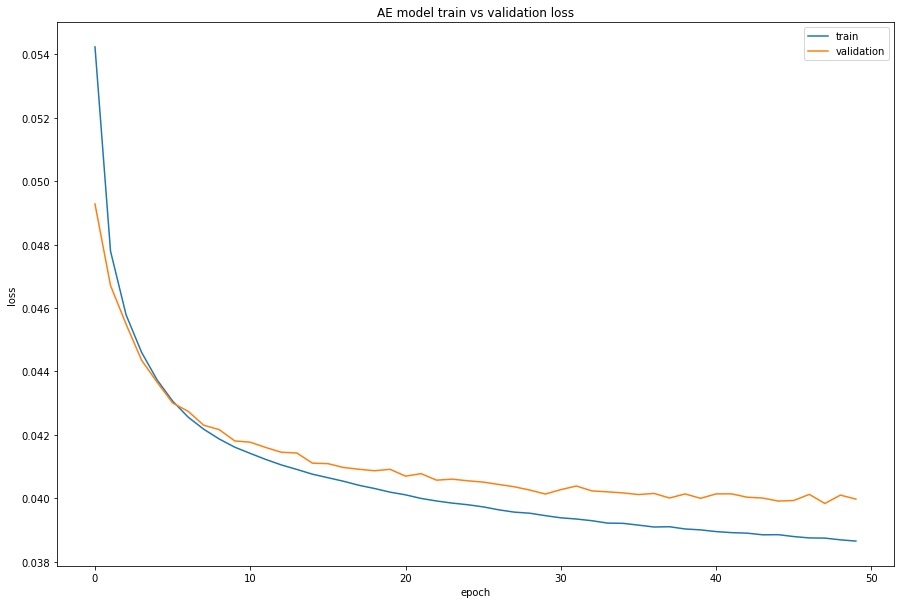

In [52]:
# your code here
plt.figure(figsize=(15, 10))
plt.plot(history_ae.history['loss'])
plt.plot(history_ae.history['val_loss'])
plt.title('AE model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


In [54]:
# your code here
ae_latent_train = encoder.predict(x_train)

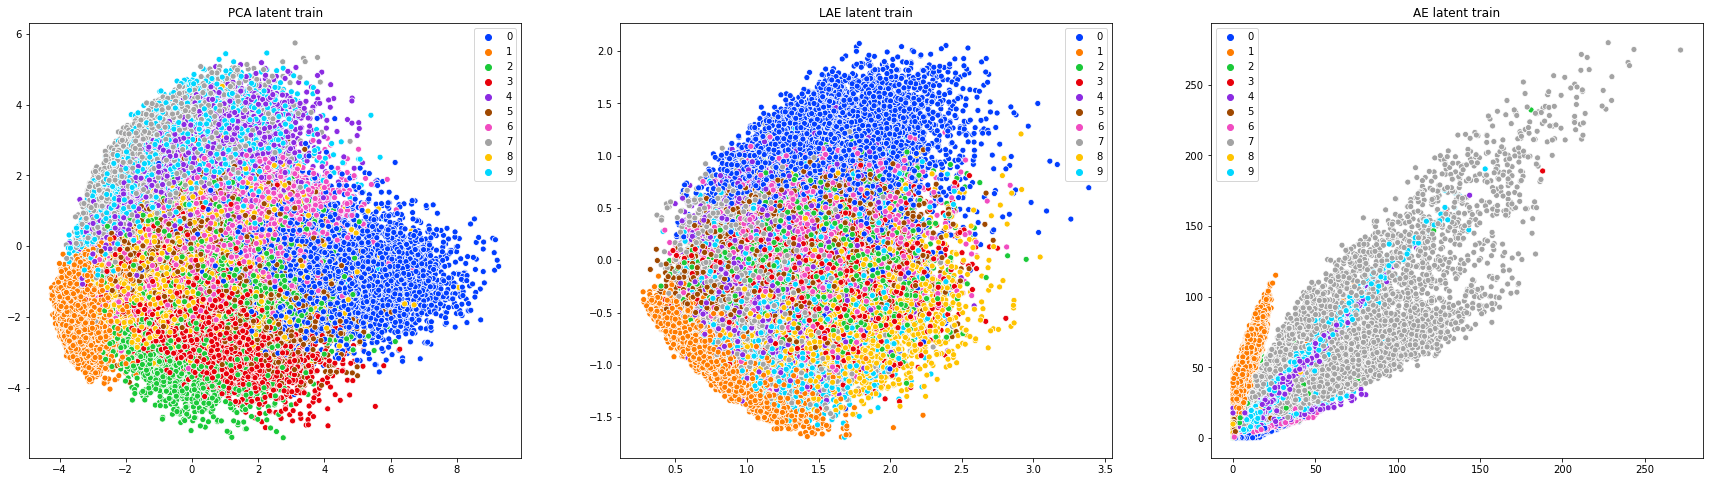

In [55]:
# your code here

fig = plt.figure(figsize=(30, 8))
plt.subplot(1,3,1)
sns.scatterplot(pca_latent_train[:,0],
                pca_latent_train[:,1],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
plt.title('PCA latent train')

plt.subplot(1,3,2)
sns.scatterplot(lae_latent_train[:,1],
                lae_latent_train[:,0],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
plt.title('LAE latent train')

plt.subplot(1,3,3)
sns.scatterplot(ae_latent_train[:,1],
                ae_latent_train[:,0],
                palette=sns.color_palette("bright", 10),
                hue=y_train
               )
plt.title('AE latent train')

plt.show()

*Your answer here*

In the non-linear autoencoder's latent space representation of x_train, the values are more spreadout and less overlaps as seen in the PCA and LAE latent space representation.

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


In [61]:
# your code here
pca_latent_test = pca.transform(x_test.reshape(x_test.shape[0], -1))
pca_recons_x_test = pca.inverse_transform(pca_latent_test).reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2])
print(pca_recons_x_test.shape)

lae_recons_x_test = lae.predict(x_test)
print(lae_recons_x_test.shape)

ae_recons_x_test = ae.predict(x_test)
print(ae_recons_x_test.shape)

(10000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


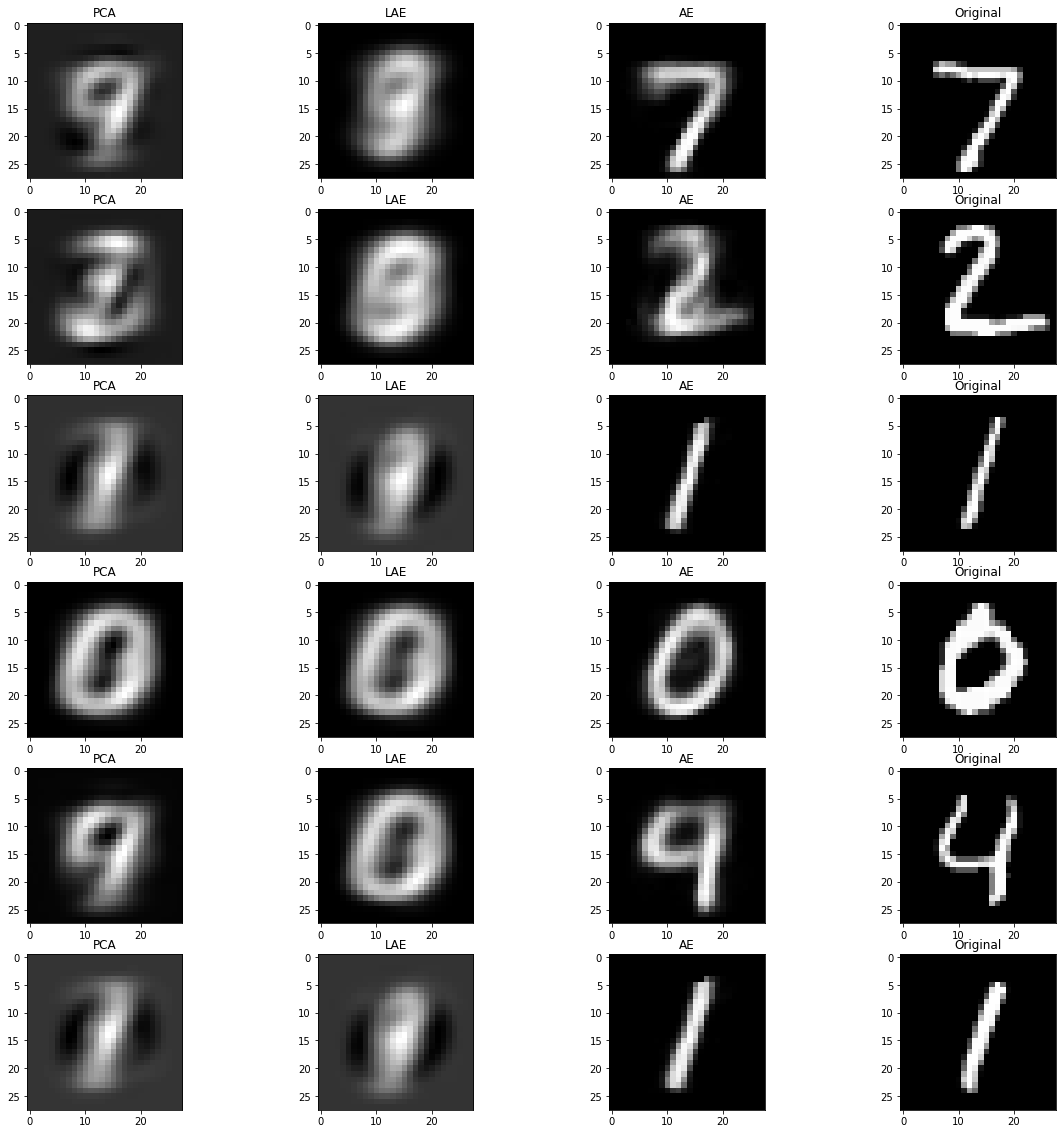

In [77]:
# your code here
fig, ax = plt.subplots(6,4,figsize=(20, 20))
# take the first 6 images of x_test
for i in range(6):
    ax[i,0].set_title('PCA')
    ax[i,0].imshow(pca_recons_x_test[i,:,:], cmap='gray')
    ax[i,1].set_title('LAE')
    ax[i,1].imshow(lae_recons_x_test[i,:,:], cmap='gray')
    ax[i,2].set_title('AE')
    ax[i,2].imshow(ae_recons_x_test[i,:,:], cmap='gray')
    ax[i,3].set_title('Original')
    ax[i,3].imshow(x_test[i,:,:], cmap='gray')   


**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [87]:
# your code here
print('PCA: ',mean_squared_error(x_test.flatten(), pca_recons_x_test.flatten()))
print('LAE: ',mean_squared_error(x_test.flatten(), lae_recons_x_test.flatten()))
print('AE: ',mean_squared_error(x_test.flatten(), ae_recons_x_test.flatten()))

PCA:  0.055669491205739656
LAE:  0.05774799098456329
AE:  0.039971814872383965


*Your answer here*

Yes, it support the answer in 1.8, where PCA seems to be doing a slightly better job than LAE.
However, if we compare it to the regular autoencoder (AE), AE seems to be doing the best job because it captures the non-linear complexity of the image as well.

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [21]:
# your code here


In [22]:
# your code here


**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [23]:
# your code here


**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [24]:
# your code here


In [25]:
# your code here


**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


In [26]:
# your code here


In [27]:
# your code here


*Your answer here*

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [28]:
# your code here


In [29]:
# your code here


**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


In [36]:
# your code here


In [37]:
# your code here


*Your answer here*

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

In [38]:
# your code here


*Your answer here*